# **Convolutional Neural Networks (CNN)**

A ***convolutional neural network (CNN)*** is a type of neural network that processes grid-structured data, particularly images, and detects patterns within that data.

The key difference between a CNN and a simple multilayer perceptron is that a CNN is in charge of extracting its own features from the data.

It does this in the ***convolutional layer*** of the network where it uses small, grid-shaped filters known as ***kernels*** for feature extraction.
<br>
The kernels slide over the input data—like the pixels of an image—and apply a mathetmatical operation called a ***convolution*** to the area in the input data they are covering, one area at a time throughout the entire input.

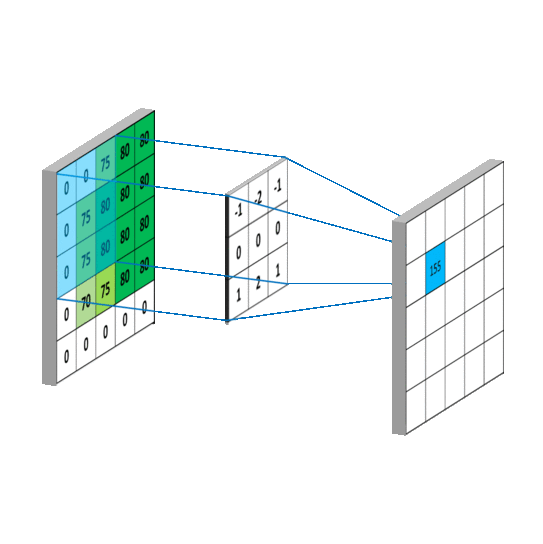

The convolutional layer outputs a set of ***feature maps***, filtered versions of the original image, highlighting specific features.

For instance, let's say you input an image of the number $9$. The feature maps and filters may look something like this:
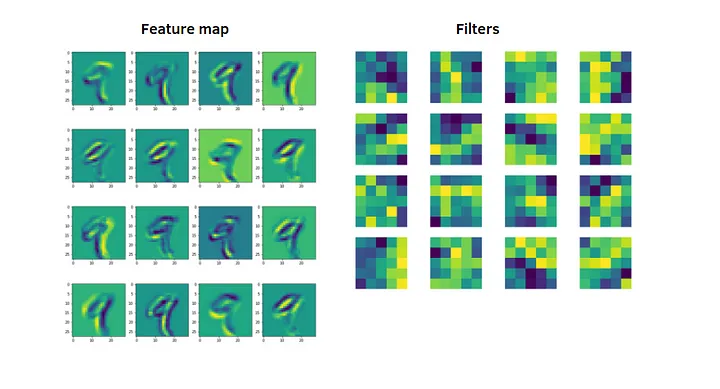

As you can see, different characteristics, or features of $9$ are captured by each filter, *extracting the features* of the image.

These features are then passed to the ***fully connected layer***, a simple feedforward neural network, which uses the features to classify the image.
<br></br>
The 3Blue1Brown video below does an excellent job of explaining some of the math and intuition behind convolutions.

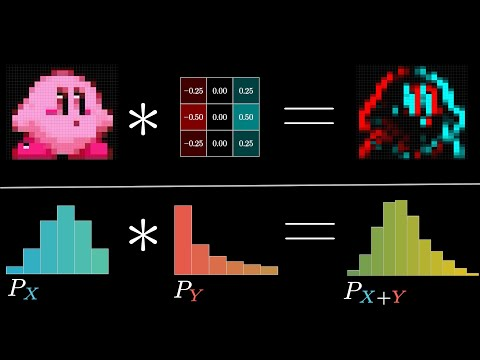

In [1]:
#@title **3Blue1Brown Video - Convolutions**

from IPython.display import YouTubeVideo
YouTubeVideo('KuXjwB4LzSA')

### **MNIST Image Convolution Example**

The code below applies a kernel that detects *vertical edges* to a 28x28 px image of an MNIST digit.

**Challenge: Can you change the kernel so it detects horizontal edges instead?**

In [2]:
# Convert drawn image to grayscale
import cv2
import numpy as np
import matplotlib.pyplot as plt

#----------------------------------------------------#

# Apply a convolution to an image

img = cv2.imread(f"/content/drive/MyDrive/MNIST/7.jpg")

# Image in 28x28 array of grayscale values for each pixel
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kernel for detecting vertical edges
# Change in pixel value from dark-->light results in a high positive value
vert_kernel = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

horiz_kernel = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]])

# Apply kernel to image
conv_img = cv2.filter2D(grayscale_img, -1, horiz_kernel)

#----------------------------------------------------#

# Plotting

# Create a new figure with a specified size
plt.figure(figsize=(12, 6))

# Add a subplot for the original image
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.imshow(grayscale_img, cmap='gray')
plt.title("Original Image")

# Add a subplot for the convolved image
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.imshow(conv_img, cmap='gray')
plt.title("Convolved Image")

# Display the figure with two subplots
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
#@title **CNN Classification of MNIST Dataset**
from keras.datasets import mnist
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch
from torch import Tensor

#----------------------------------------------#

# Define CNN class

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # Convolutional Layer
    # 1 channel (grayscale), 3 filters, each filter is 5x5
    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    # Fully Connected Layer
    # 1728 inputs - Three 24x24 feature maps (3*24*24 = 1728)
    # One hidden layer with 64 neurons
    self.fcl1 = nn.Linear(1728, 128)
    self.fcl2 = nn.Linear(128, 64)
    self.fcl3 = nn.Linear(64, 1)

  def forward(self, x):
    # Pass through convolutional layer with ReLU activation
    x = torch.relu(self.conv(x))
    # Flatten convolutional layer output to prepare for FCL
    x = x.view(x.size(0), -1)
    # Pass through first layer in FCL with ReLU
    x = torch.relu(self.fcl1(x))
    x = torch.relu(self.fcl2(x))
    # Pass through output layer with sigmoid
    x = torch.sigmoid(self.fcl3(x))
    return x

#----------------------------------------------#

# Data

# Load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Convert to binary classification (0-4 = 0, 5-9 = 1)
train_y = [0 if y_i < 5 else 1 for y_i in train_y]
test_y = [0 if y_i < 5 else 1 for y_i in test_y]

# Convert data to tensors
train_X = torch.tensor(train_X, dtype=torch.float32).unsqueeze(1)
train_y = torch.tensor(train_y, dtype=torch.float32)

#----------------------------------------------#

# Training

model = CNN()

# Binary cross-entropy loss function
loss_function = nn.BCELoss()
# Gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(20):
  # Obtain predictions
  y_pred = model(train_X).squeeze()

  # Calculate loss
  loss = loss_function(y_pred, train_y)

  # Reset gradients to zero to prepare for calculations
  optimizer.zero_grad()
  # Calculate gradients
  loss.backward()
  # Update parameters
  optimizer.step()

#----------------------------------------------#

# Testing

# Convert testing dataset to tensors
test_X = torch.tensor(test_X, dtype=torch.float32).unsqueeze(1)
test_y = torch.tensor(test_y, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Obtain predictions without calculating gradients (not training)
with torch.no_grad():
    test_pred = model(test_X).squeeze()

# σ(z) > 0.5 = 1
# σ(z) <= 0.5 = 0
predicted = test_pred > 0.5

# Calculate the accuracy rate
# Finds average # of predictions and converts it from a tensor to a number (.item())
accuracy = (predicted == test_y).float().mean().item()

print(f'Accuracy: {accuracy*100:.2f}%')



#### **Helpful articles about CNNs**

https://www.analyticsvidhya.com/blog/2020/02/mathematics-behind-convolutional-neural-network/

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/